In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ATAC = pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";")
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC_Bcells = pd.read_csv("data/ATAC_QC_Bcells.csv")
QC.head()


,SampleName,CellType,ImmGenLab,Lineage,CellFamily,Organ,SortingMarkers,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
0,LTHSC.34-.BM#1,LTHSC.34-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34-,677,22287984,"4,58",2470102,"10,6",NaN
1,LTHSC.34+.BM#1,LTHSC.34+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150+CD48-CD34+,2483,28588536,"3,17",7675501,"7,7",NaN
2,STHSC.150-.BM#1,STHSC.150-.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135-CD150-CD48-,3660,22170346,"3,25",6060045,"11,13",NaN
3,MPP4.135+.BM#1,MPP4.135+.BM,Wagers,Stem&Prog,Stem&Prog Cell,Bone Marrow,Lin-Sca1+ckit+CD135+,10000,24003590,"13,83",6128252,"18,96",NaN
4,proB.CLP.BM#1,proB.CLP.BM,Hardy,B,B Cell,Bone Marrow,CD19-IgM-CD43+CD24-CD45R-CD93+CD117+IL7Ra+PI-D...,10000,23578208,"7,67",6588564,"13,21","0,868"


In [31]:
QC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   SampleName                                  181 non-null    object
 1   CellType                                    181 non-null    object
 2   ImmGenLab                                   181 non-null    object
 3   Lineage                                     181 non-null    object
 4   CellFamily                                  181 non-null    object
 5   Organ                                       181 non-null    object
 6   SortingMarkers                              181 non-null    object
 7   InputCellNumber                             181 non-null    int64 
 8   PF.reads                                    181 non-null    int64 
 9   %chrM.mapped                                181 non-null    object
 10  Paired.read.after.removing

In [32]:
QC.shape

(181, 13)

In [33]:
QC.describe(include='all') 

,SampleName,CellType,ImmGenLab,Lineage,CellFamily,Organ,SortingMarkers,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
count,181,181,181,181,181,181,181,181.000000,1.810000e+02,181,1.810000e+02,181,176
unique,181,90,15,10,46,14,80,NaN,NaN,171,NaN,174,62
top,LTHSC.34-.BM#1,MF.ICAM+480hi.PC,CBDM,B,B Cell,Spleen,"CD1dTetramer(alphaGalCer)+TCRbMedPI-Dump(CD8,C...",NaN,NaN,"5,5",NaN,"8,39","0,932"
freq,1,4,34,39,23,65,8,NaN,NaN,2,NaN,2,9
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9858.121547,2.459027e+07,NaN,7.105366e+06,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1008.920709,6.575663e+06,NaN,2.158901e+06,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677.000000,1.614223e+07,NaN,2.470102e+06,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,2.104140e+07,NaN,5.818161e+06,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,2.319932e+07,NaN,6.841995e+06,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,2.587249e+07,NaN,7.869675e+06,NaN,NaN


In [34]:
#transform object in numerical data (from InputCelLNumber)

QC_conv = QC.copy()
#coloumn names
col_names = QC.columns

# all coloumns from InputCellNumber
start_col = col_names.get_loc("InputCellNumber")

# numerical columns from InputCellNumber
transform_cols = col_names[start_col:]

# object coloumns from "InputCellNumber"
obj_cols = [col for col in transform_cols if QC[col].dtype == 'object']

# convert: 
# "," in "." -> decimal
for col in obj_cols:
    QC_conv[col] = (QC[col].astype(str).str.replace(',', '.', regex=False).str.strip().replace('', np.nan))
    QC_conv[col] = pd.to_numeric(QC_conv[col], errors='coerce')


QC_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SampleName                                  181 non-null    object 
 1   CellType                                    181 non-null    object 
 2   ImmGenLab                                   181 non-null    object 
 3   Lineage                                     181 non-null    object 
 4   CellFamily                                  181 non-null    object 
 5   Organ                                       181 non-null    object 
 6   SortingMarkers                              181 non-null    object 
 7   InputCellNumber                             181 non-null    int64  
 8   PF.reads                                    181 non-null    int64  
 9   %chrM.mapped                                181 non-null    float64
 10  Paired.read.af

# filter criteria

count    181.000000
mean      13.436630
std        5.818404
min        3.940000
25%        8.880000
50%       12.520000
75%       17.530000
max       31.840000
Name: %fragment.1Kb_TSS, dtype: float64


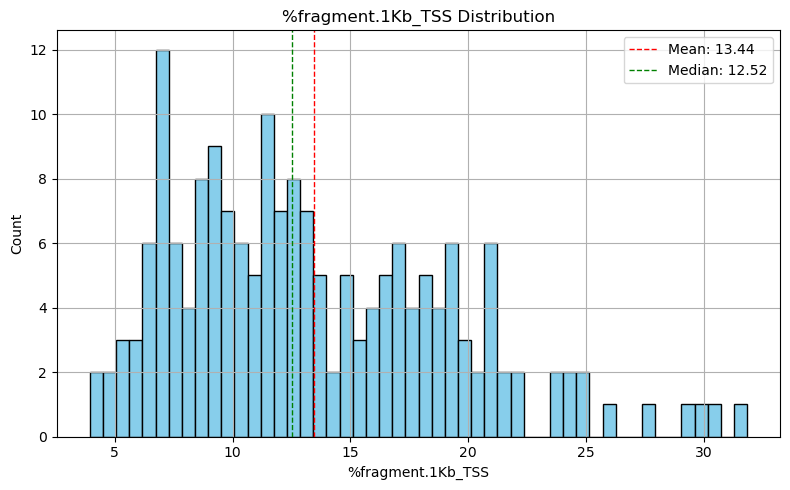

In [40]:
#TSS
stats = QC_conv["%fragment.1Kb_TSS"].describe()
mean_TSS = stats["mean"]
median_TSS = stats["50%"]

print(stats)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
QC_conv["%fragment.1Kb_TSS"].hist(bins=50, color="skyblue", edgecolor="black")
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=1, label=f'Median: {median_val:.2f}')
plt.title("%fragment.1Kb_TSS Distribution")
plt.xlabel("%fragment.1Kb_TSS")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
#duplicates -> how many reads are repeating?
QC_conv["Duplicates"] = QC_conv["PF.reads"] - QC_conv["Paired.read.after.removing.PCR.duplication"]

In [37]:
# filtern
high_quality = QC_conv[(QC_conv["%fragment.1Kb_TSS"] > 6)]

/var/folders/3z/6q4wn97912s24zf9dft62_fm0000gn/T/ipykernel_43604/3856671053.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


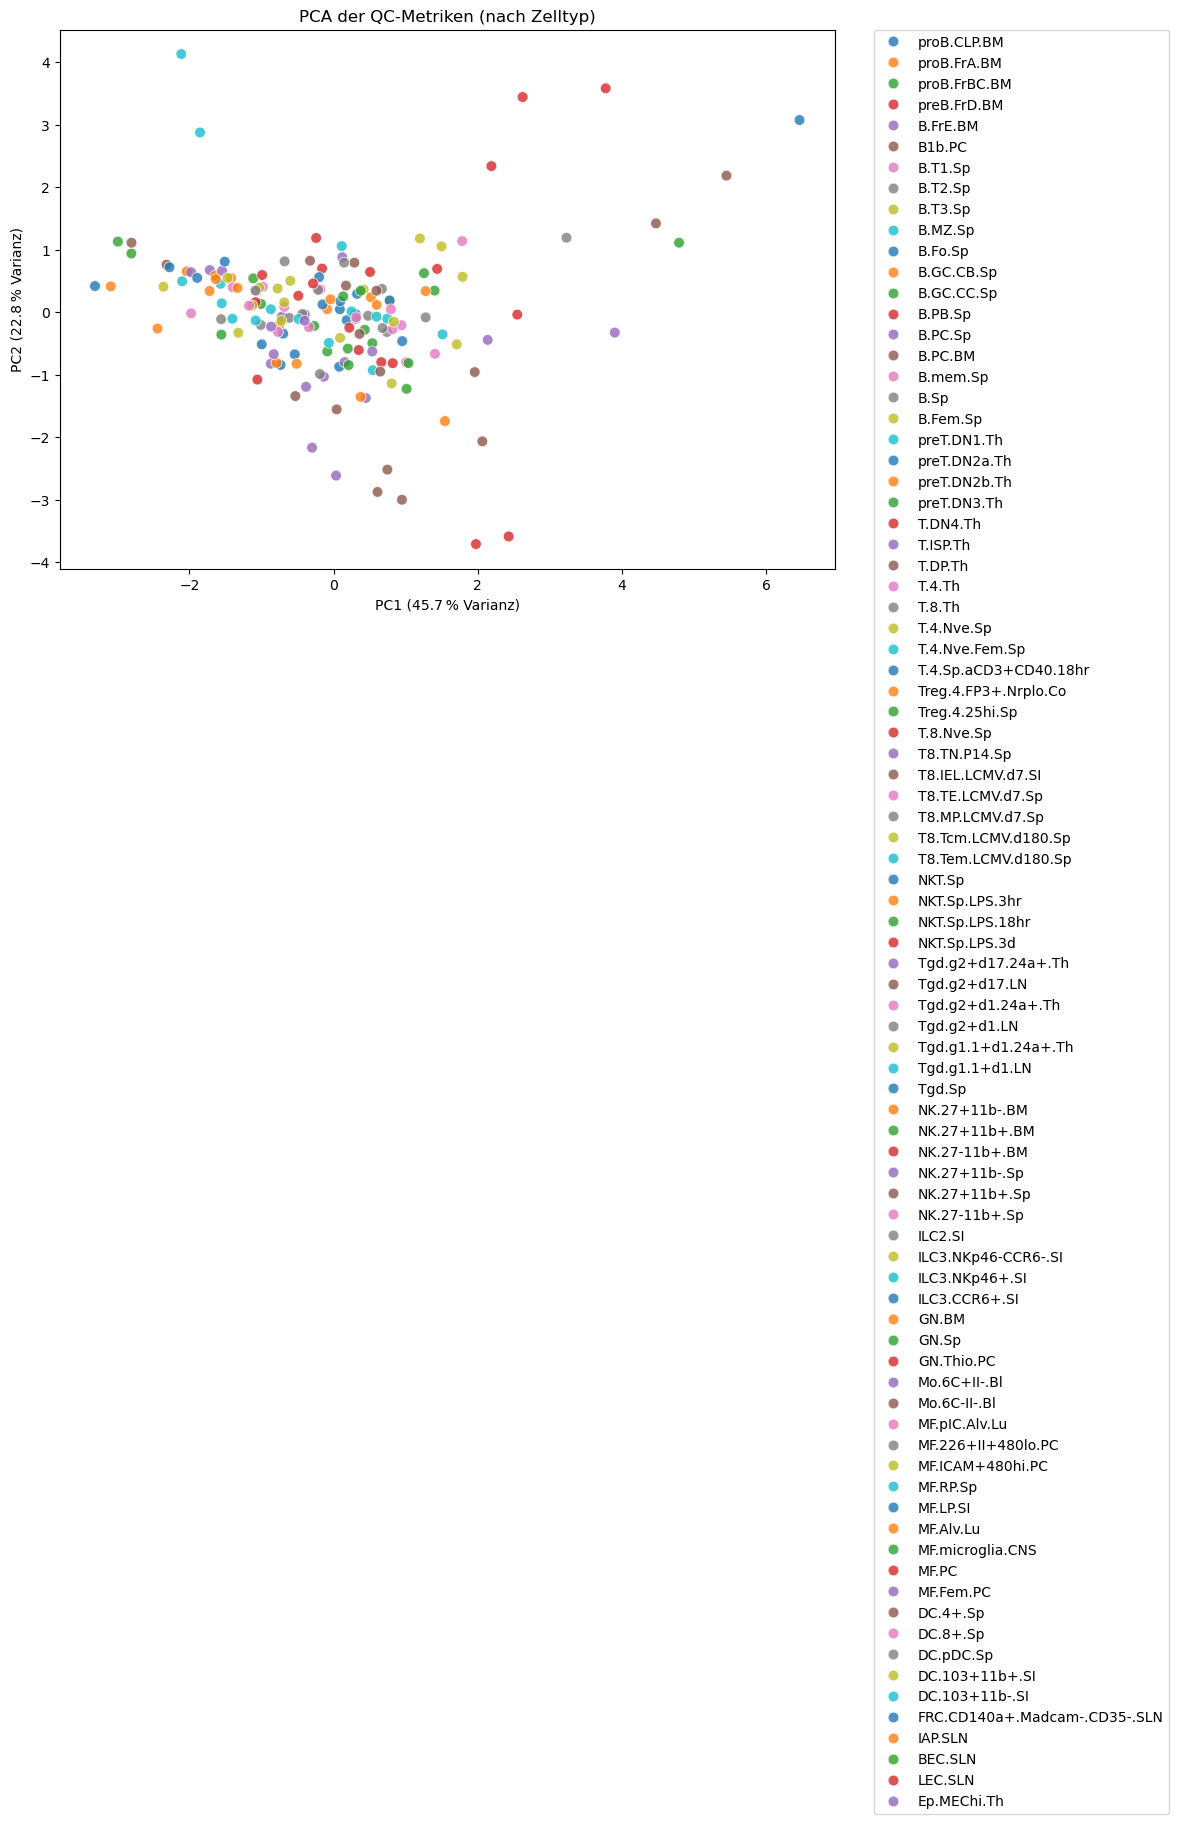

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Relevante Spalten für PCA
qc_features = [
    "InputCellNumber",
    "PF.reads",
    "Paired.read.after.removing.PCR.duplication",
    "%fragment.1Kb_TSS",
    "Replicate.cor"
]

# Bereinigen: % entfernen und Kommas durch Punkte ersetzen
QC["%fragment.1Kb_TSS"] = QC["%fragment.1Kb_TSS"].str.replace("%", "", regex=False).str.replace(",", ".")
QC["Replicate.cor"] = QC["Replicate.cor"].str.replace(",", ".")

# Umwandeln in numerisch
QC["%fragment.1Kb_TSS"] = pd.to_numeric(QC["%fragment.1Kb_TSS"], errors="coerce")
QC["Replicate.cor"] = pd.to_numeric(QC["Replicate.cor"], errors="coerce")

# NaNs entfernen
QC_clean = QC.dropna(subset=qc_features + ["CellType"])

# Standardisieren
X = QC_clean[qc_features]
X_scaled = StandardScaler().fit_transform(X)

# PCA durchführen
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Ergebnis-Datensatz
pca_QC = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_QC["CellType"] = QC_clean["CellType"].values

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_QC, x="PC1", y="PC2", hue="CellType", palette="tab10", s=60, alpha=0.8)
plt.title("PCA der QC-Metriken (nach Zelltyp)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f} % Varianz)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f} % Varianz)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

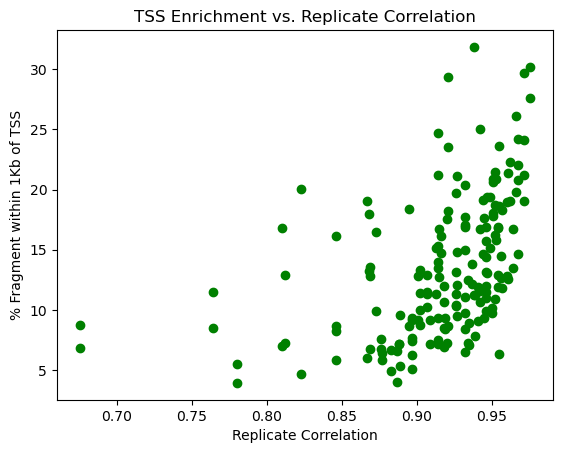

In [7]:

QC["%fragment.1Kb_TSS"] = QC["%fragment.1Kb_TSS"].str.replace("%", "", regex=False).str.replace(",", ".")
QC["Replicate.cor"] = QC["Replicate.cor"].str.replace(",", ".")

QC["%fragment.1Kb_TSS"] = pd.to_numeric(QC["%fragment.1Kb_TSS"], errors="coerce")
QC["Replicate.cor"] = pd.to_numeric(QC["Replicate.cor"], errors="coerce")

n = min(1000, len(QC))
QC_sampled = QC.sample(n=n, random_state=42)

plt.scatter(QC_sampled["Replicate.cor"], QC_sampled["%fragment.1Kb_TSS"], color="green")
plt.xlabel("Replicate Correlation")
plt.ylabel("% Fragment within 1Kb of TSS")
plt.title("TSS Enrichment vs. Replicate Correlation")
plt.show()

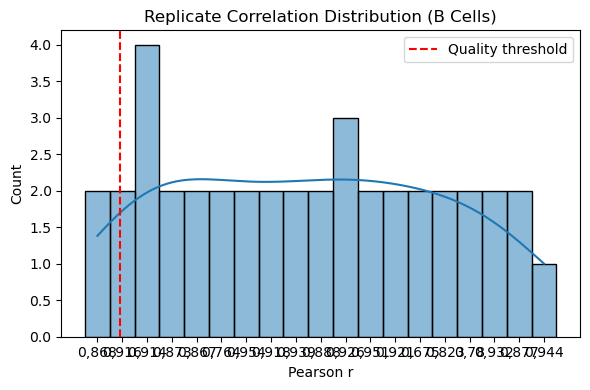

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(QC_Bcells["Replicate.cor"], bins=20, kde=True)
plt.axvline(0.9, color="red", linestyle="--", label="Quality threshold")
plt.title("Replicate Correlation Distribution (B Cells)")
plt.xlabel("Pearson r")
plt.legend()
plt.tight_layout()
plt.show()